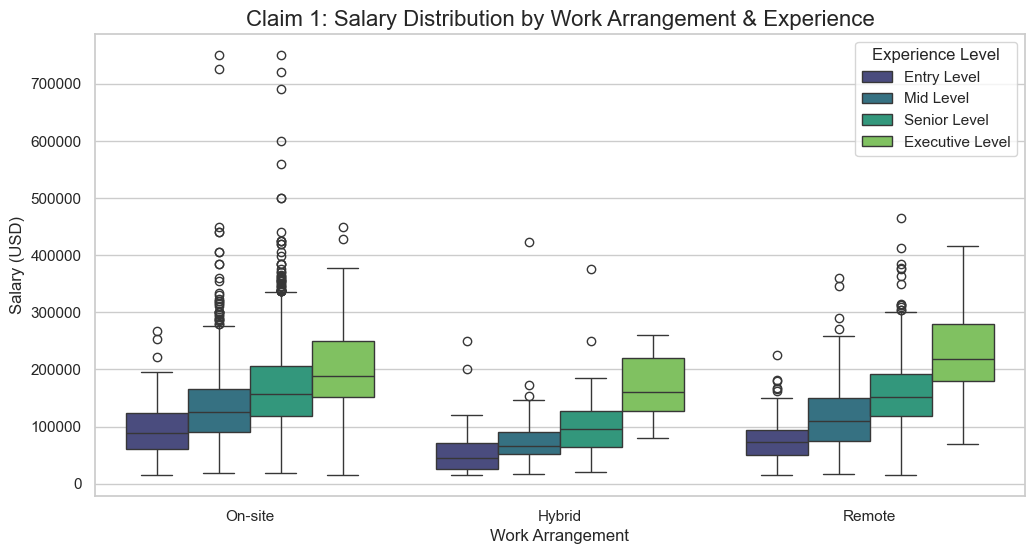

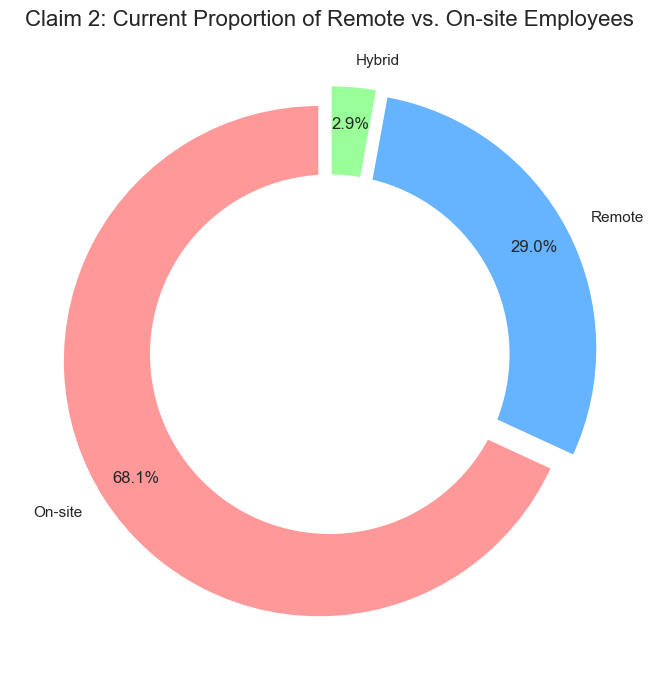

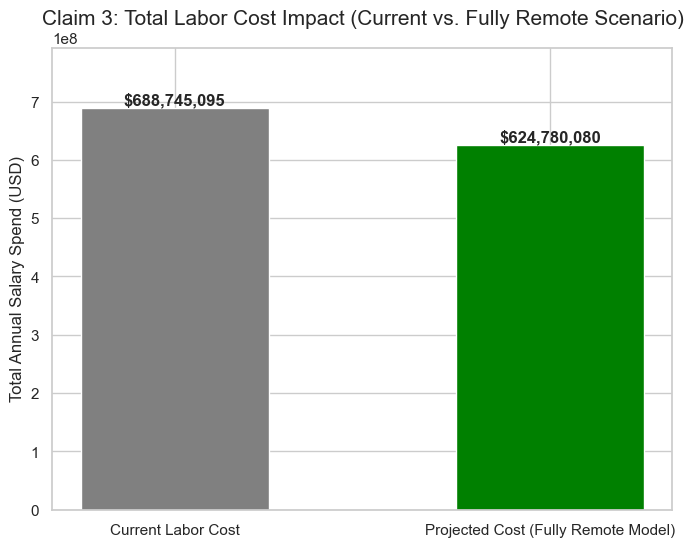

Potential Savings: $63,965,015 (9.29%)


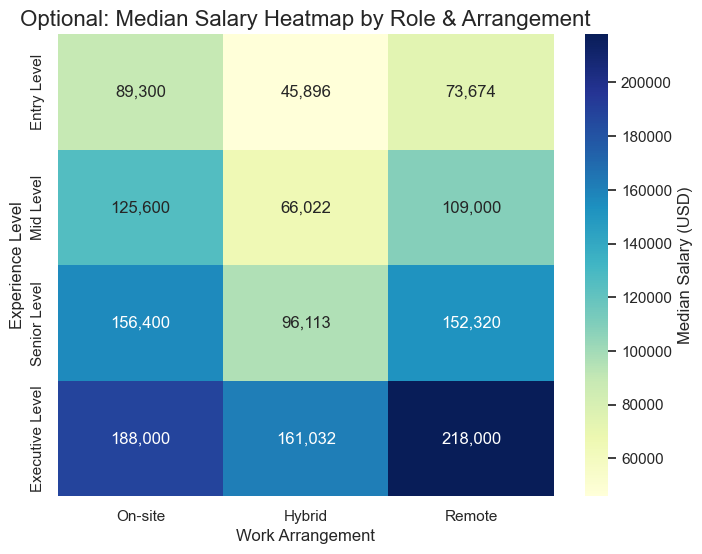

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. SETUP & DATA PREPARATION
# ==========================================
# Load Data
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# Set Style
sns.set(style="whitegrid")

# Mappings for cleaner labels
experience_map = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}
remote_map = {
    0: 'On-site', 
    50: 'Hybrid', 
    100: 'Remote'
}

# Apply Mappings
df['Experience Level'] = df['experience_level'].map(experience_map)
df['Work Arrangement'] = df['remote_ratio'].map(remote_map)

# Define logical order for charts
exp_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
remote_order = ['On-site', 'Hybrid', 'Remote']

# ==========================================
# 2. VISUAL FOR CLAIM 1: REMOTE WORK AFFECTS SALARY
#    (Grouped Box Plot)
# ==========================================
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Work Arrangement',
    y='salary_in_usd',
    hue='Experience Level',
    data=df,
    order=remote_order,
    hue_order=exp_order,
    palette='viridis'
)

plt.title('Claim 1: Salary Distribution by Work Arrangement & Experience', fontsize=16)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xlabel('Work Arrangement', fontsize=12)
plt.legend(title='Experience Level', loc='upper right')
plt.show()


# ==========================================
# 3. VISUAL FOR CLAIM 2: CURRENT REMOTE ADOPTION
#    (Donut/Pie Chart)
# ==========================================
# Calculate counts
adoption_counts = df['Work Arrangement'].value_counts()

# Prepare data for pie chart
labels = adoption_counts.index
sizes = adoption_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99'] # Soft colors (Red, Blue, Green)

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0.05, 0.05))

# Draw a circle at the center to make it a Donut Chart (looks more modern)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Claim 2: Current Proportion of Remote vs. On-site Employees', fontsize=16)
plt.tight_layout()
plt.show()


# ==========================================
# 4. VISUAL FOR CLAIM 3: LABOR COST IMPACT SCENARIO
#    (Scenario Bar Chart: Current vs. Projected)
# ==========================================
# Calculate Current Total Annual Cost
current_total_cost = df['salary_in_usd'].sum()

# Calculate "Projected" Cost (If everyone switched to Remote rates)
# Step A: Find median salary for 'Remote' roles at each experience level
remote_benchmarks = df[df['remote_ratio'] == 100].groupby('Experience Level')['salary_in_usd'].median()

# Step B: Apply these benchmarks to the whole dataset based on experience level
# (This simulates: "What if we paid everyone the current market rate for Remote work?")
def get_projected_salary(row):
    # Lookup the median remote salary for this person's level
    return remote_benchmarks.get(row['Experience Level'], row['salary_in_usd'])

df['projected_remote_salary'] = df.apply(get_projected_salary, axis=1)
projected_total_cost = df['projected_remote_salary'].sum()

# Step C: Plot
costs = [current_total_cost, projected_total_cost]
scenarios = ['Current Labor Cost', 'Projected Cost (Fully Remote Model)']
colors = ['grey', 'green']

plt.figure(figsize=(8, 6))
bars = plt.bar(scenarios, costs, color=colors, width=0.5)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000000, f'${yval:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Claim 3: Total Labor Cost Impact (Current vs. Fully Remote Scenario)', fontsize=15)
plt.ylabel('Total Annual Salary Spend (USD)', fontsize=12)
plt.ylim(0, max(costs) * 1.15) # Add headroom for labels
plt.show()

# Print Savings Calculation for your report text
savings = current_total_cost - projected_total_cost
print(f"Potential Savings: ${savings:,.0f} ({(savings/current_total_cost)*100:.2f}%)")


# ==========================================
# 5. OPTIONAL VISUAL: PATTERNS BY LEVEL
#    (Heatmap of Median Salaries)
# ==========================================
# Create a pivot table of Median Salary
pivot_table = df.pivot_table(
    values='salary_in_usd', 
    index='Experience Level', 
    columns='Work Arrangement', 
    aggfunc='median'
).reindex(exp_order) # Ensure correct order

# Reorder columns
pivot_table = pivot_table[['On-site', 'Hybrid', 'Remote']]

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=",.0f", cmap="YlGnBu", cbar_kws={'label': 'Median Salary (USD)'})
plt.title('Optional: Median Salary Heatmap by Role & Arrangement', fontsize=16)
plt.xlabel('Work Arrangement')
plt.ylabel('Experience Level')
plt.show()